**Mengimport library yang dibutuhkan dan menampilkan data**


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
import joblib

# Memuat data
data = pd.read_csv('train.csv')

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **Memilih Fitur**
Karena disini semua fitur berpengaruh atau tidak ada yang tidak relevan maka semua fitur digunakan. Dan disini terdapat satu fitur target yaitu price range

In [29]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# **Mengecek Missing Values**
Disini dataset tidak ada missing values, jadi tidak perlu untuk menghapus atau merubah datanya

In [30]:
# Mengecek missing values dalam dataset
missing_values = data.isnull().sum()
print(missing_values)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# **Mengubah data kategorikal menjadi numerik**
Karena dataset ini semuany sudah bertipe numerik maka tidak perlu mengubahnya lagi

In [31]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# **Memisahkan fitur target**

In [32]:
X = data.drop(['price_range'], axis=1)

y = data['price_range']

# **Memisahkan data menjadi set pelatihan dan pengujian**

In [33]:
# Membuat data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# cek bentuk dari X_train and X_test
X_train.shape, X_test.shape

((1600, 20), (400, 20))

# **Training menggunakan kmeans**

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

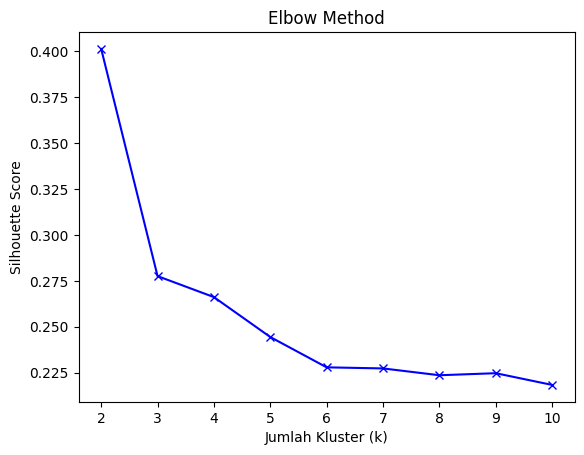

In [34]:

# Inisialisasi daftar untuk menyimpan skor silhouette
silhouette_scores = []

## Menentukan rentang jumlah kluster yang akan diuji
k_values = range(2, 11)

# Melakukan K-means clustering untuk setiap jumlah kluster
for k in k_values:
    # Inisialisasi KMeans object
    kmeans = KMeans(n_clusters=k)
    
    # Melatih model K-means clustering
    kmeans.fit(X)
    
    # Prediksi kluster untuk setiap sampel
    y_pred = kmeans.predict(X)
    
    # Menghitung skor silhouette
    silhouette_avg = silhouette_score(X, y_pred)
    silhouette_scores.append(silhouette_avg)

# Plot elbow curve
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method')
plt.show()

In [35]:
# Menyimpan model K-means ke file menggunakan joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

# Menampilkan pesan setelah menyimpan model
print("Model K-means telah disimpan")

Model K-means telah disimpan
